# Machine learning - supervised, unsupervised
# Supervised : data + label, Unsupervised : data
# Supervised : Regression, Classification
# Unsupervised : Clustering

# # Classification with various methds
# Refer to http://machinelearningmastery.com/machine-learning-in-r-step-by-step/

In [2]:
# caret : Classification And REgression Training의 약자
# contains hundreds of machine learning algorithms
library(caret)

Warning message:
"package 'caret' was built under R version 3.4.2"Loading required package: lattice
Loading required package: ggplot2


In [3]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris
head(dataset,5)
#sepal 꽃받침 petal

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


# Or download iris.csv to your working folder and read

In [4]:
# define the filename
#filename <- "iris.csv"
# load the CSV file from the local directory
#dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
#colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")
#dataset

In [5]:
# create a list of 80% of the rows in the original dataset we can use for training 종 병로speices 80퍼 
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation 나머지 데이터 넣기!!!!
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [6]:
# dimensions of dataset 데이터 개수(행) col 개수
dim(dataset)

[1] 120   5

In [7]:
# list types for each attribute 변수들의 타입 facor-> 레이블이라서
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [8]:
# take a peek at the first 6 rows of the data 6개 보여줌
head(dataset)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [9]:
# list the levels for the class
levels(dataset$Species)
levels(dataset)

[1] "setosa"     "versicolor" "virginica"

NULL

In [10]:
# summarize the class distribution
table(dataset$Species)#합 120개
percentage <- prop.table(table(dataset$Species)) * 100 #prop 비율
#percentage <- prop.table(dataset$Species) 
cbind(freq=table(dataset$Species), percentage=percentage)#괄호에 있는게 binding vector
rbind(freq=table(dataset$Species), percentage=percentage)


    setosa versicolor  virginica 
        40         40         40 

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


,setosa,versicolor,virginica
freq,40.00000,40.00000,40.00000
percentage,33.33333,33.33333,33.33333


In [11]:
# summarize attribute distributions
summary(dataset)
# 1st quater 상위 25퍼 3rd qu 하위에 25퍼 이거어디에 이용?

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.275  
 Median :5.750   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.857   Mean   :3.064   Mean   :3.762   Mean   :1.194  
 3rd Qu.:6.425   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.200   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

In [12]:
# split input and output
x <- dataset[,1:4]#데이터
y <- dataset[,5]#레이블 speices

[1] 120   4

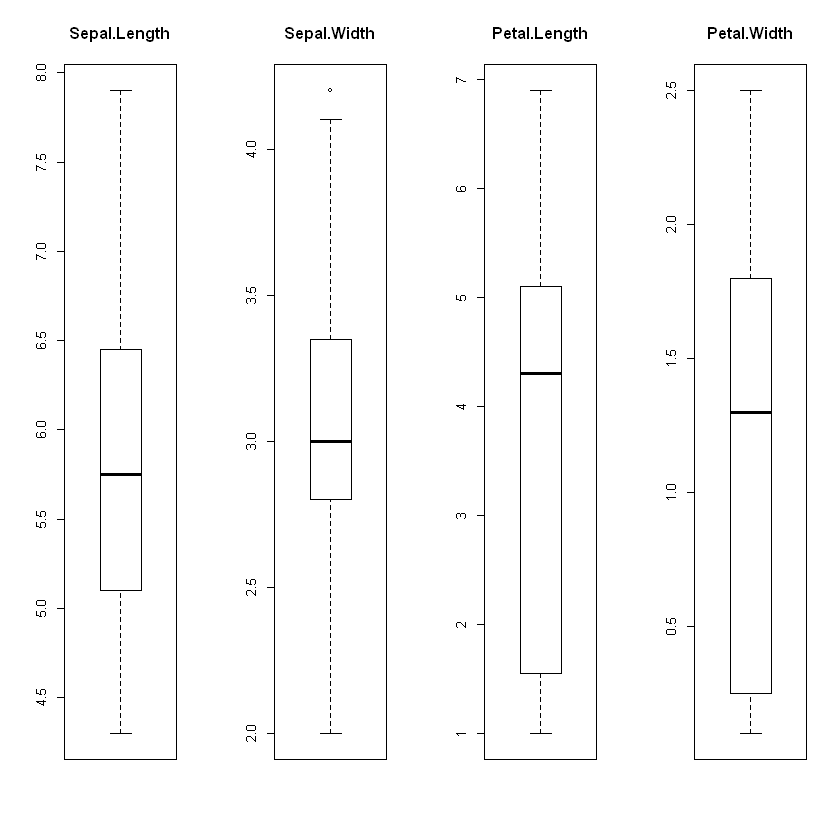

In [13]:
# boxplot for each attribute on one image
# par: Draw multiple figures on one image
# mfrow: figures arranged in 1x4 format 한 이미지에 4개 figure넣음 
dim(x)
par(mfrow=c(1,4))
  for(i in 1:4) {#1~4
  boxplot(x[,i], main=names(iris)[i])#x[,i] 위에서 데이터를 넣었는데 그거 col epal length, width peatal len, wid일케 하나씩 옮겨가면서 돔
}#main은 맨 위에 글자 쓰는 거고. data의 열이름 불러내느 함수가 names
#ㅍ main=names(iris)[i] sepal length, width peatal len, wid일케 하나씩 옮겨지면서 
# boxplot shows max, 25% percentile, median, 75% percentile, and min with oulier sometimes 박스플랏은 이 순으로 하나씩 보여줌. 점들은 outlier

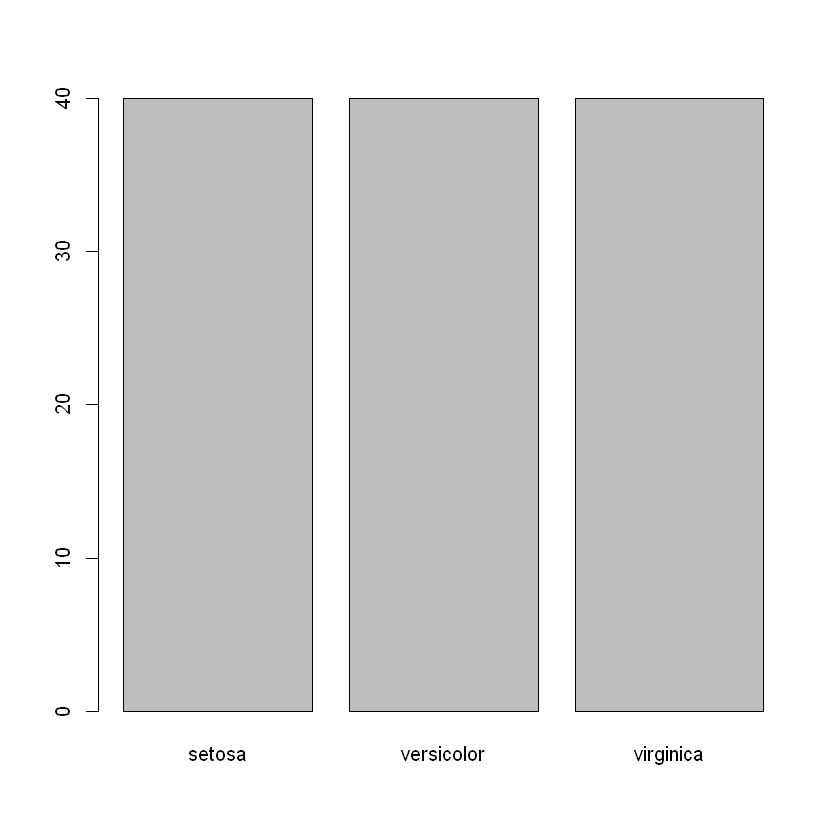

In [14]:
# barplot for class breakdown
plot(y)

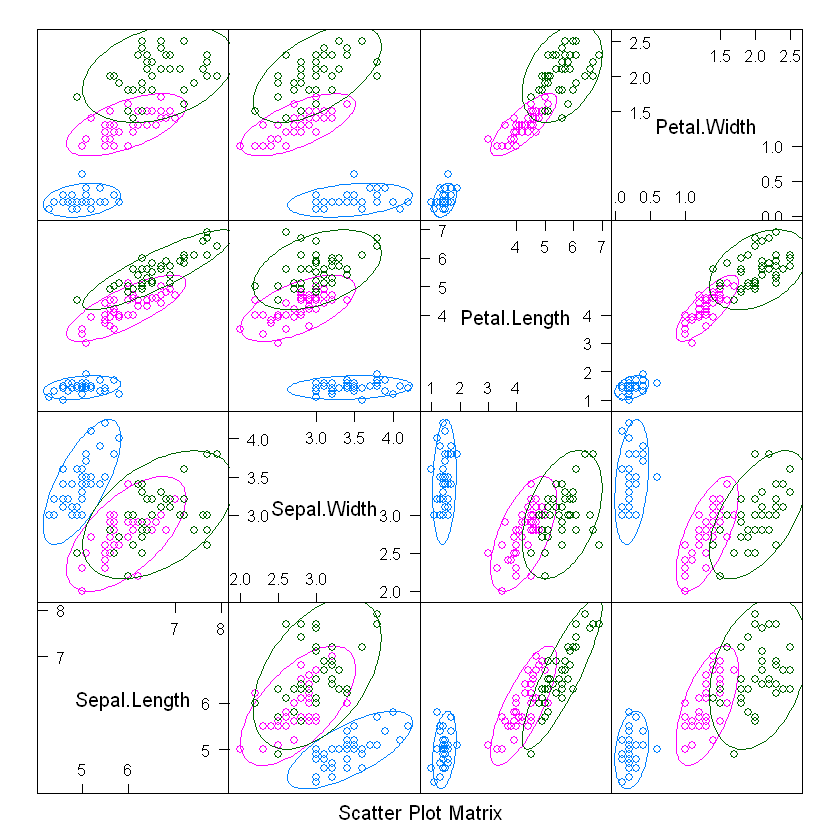

In [15]:
# scatterplot matrix
#install.packages('ellipse', repos='http://cran.us.r-project.org') 
featurePlot(x=x, y=y, plot="ellipse")#ellips 타원

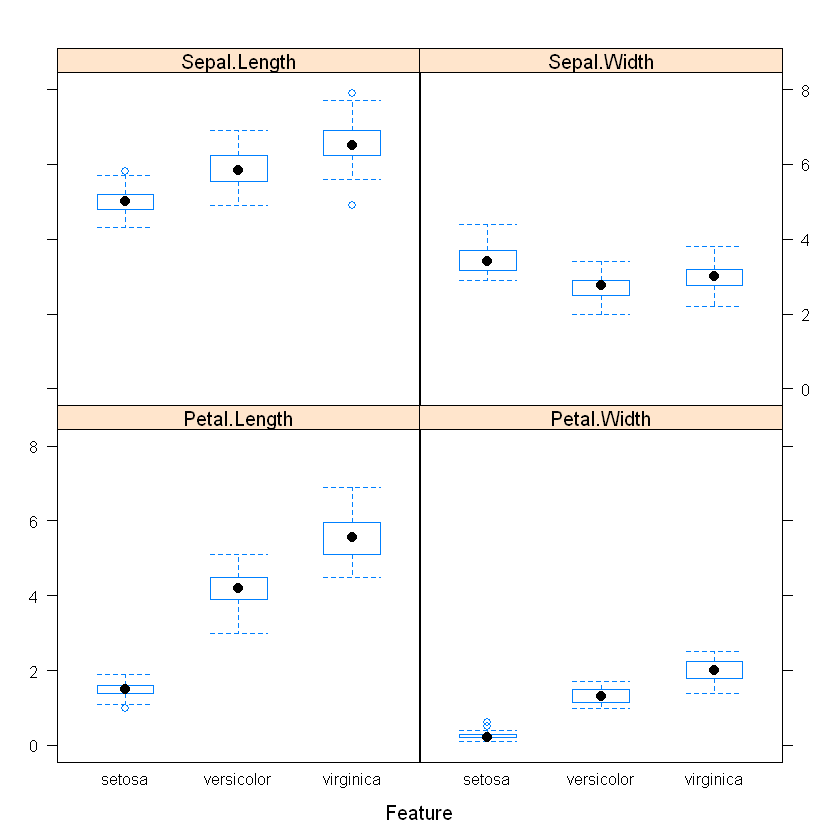

In [16]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

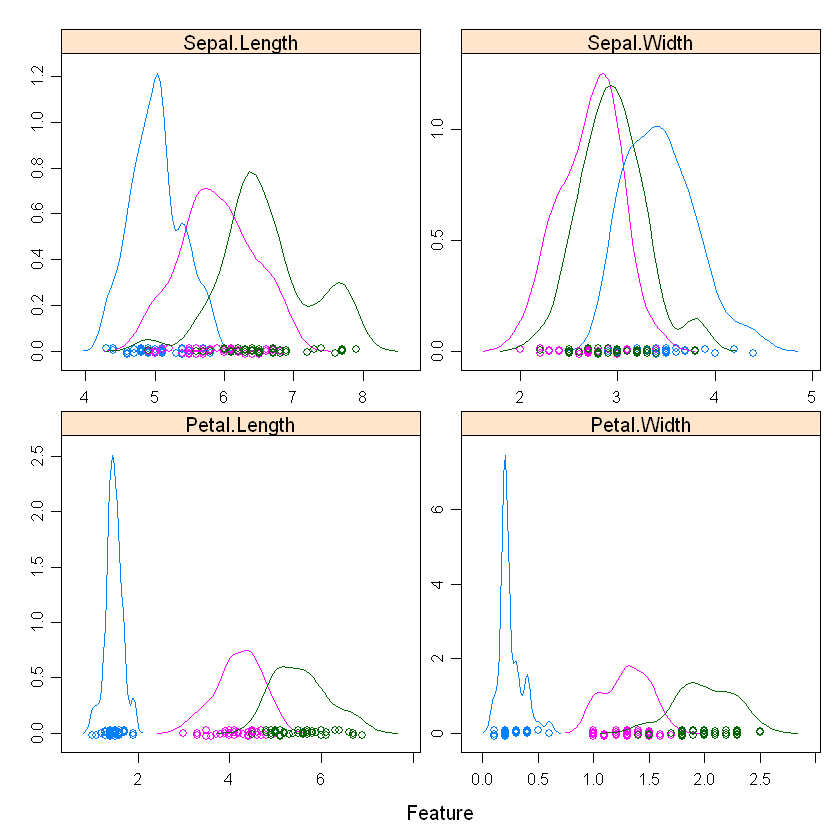

In [17]:
# density plots for each attribute by class value
# relation="free" : set scale free when displaying, i.e., not manual scaling 스케일- 범위. 이 scale을 r이 알아서
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)#d이름을dinsity로 바꿈

In [16]:
# Run algorithms using 10-fold cross validation 크로스 벨리데이션 = c, 데이터 뽑아서 훈련데이터를 다시 쓰진 않음
# package has method trainControl, 바꿔가며 10번 돌림
# method : resampling method (cv, boot, etc.) 리샘프링 - 데이터를 랜덤하게 뽑아서 훈련 후, 다시 랜덤하게 뽑아 test
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [17]:
# rpart : Recursive PARTitioning CART와 같은거
# kernlab : kernel based machine learning, contains  Support Vector Machines, SVM가지고 있음
# Spectral Clustering, Kernel PCA, Gaussian Processes and a QP solver. 그외에도 이런 거 가지고 있음
# MASS : Modern Applied Statistics with S, contains LDA 
# caret has KNN and rf rf는 random forest
library(rpart)
library(kernlab)
library(MASS)

# Train with LDA(Linear Discriminant Analysis)
set.seed(7)#랜덤수 뽑음 7은 key로 뽑을 때마다 같은 결과 나오게
# set.seed is used for reproducing the results. 
# Without it, different results will be produced for each try
# Example 이걸로 keyㅏ가 먹히는지 테스트
#sample(LETTERS, 5)
#sample(LETTERS, 5)
#set.seed(42);sample(LETTERS, 5)
#set.seed(42);sample(LETTERS, 5)

fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms    trControl=control는 cv 그거
# CART(Recursive PARtitioning): inverse of hierarchical clustering
# Start with a single cluster and then split into clusters 
# that have the smallest within cluster distances in some metric
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN(k Nearest Neighbor)
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM(Support Vector Machine)에도 여러개가 있는데 그 중에 svm Radial을 씀
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# RF(Random Forest)
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [16]:
# summarize accuracy of models
# resamples does 10-fold cross validation. 열개로 나누고 돌아가며 한갸ㅐ씩 valid로 나머지 9개를 휸련 데이터 Training data is partitioned into
# 10 disjoint sets. Runs each algo 10 times with each of 10 sets being a 
# validation set while 9 remaining sets being a training set.
# summary shows statistics of Accuracy and Kappa.
# Kappa shows how much better the classification result is than random
# class assignment. 
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)
#random하게 label준 값은 seed에 따라 물론 달라지 수 있음. 

ERROR: Error in resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, : 함수 "resamples"를 찾을 수 없습니다


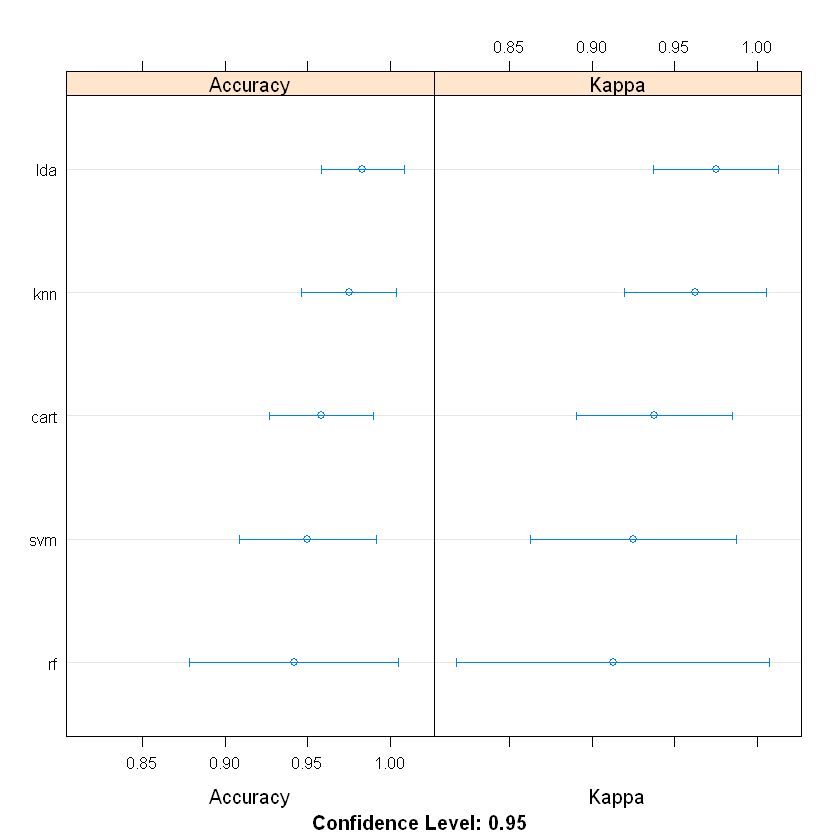

In [21]:
# compare accuracy of models
dotplot(results)

In [22]:
# summarize Best Model 108은 120을 10개로 나눈 것중 훈련데이터 9개 
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975

 


In [23]:
# estimate skill of LDA on the validation dataset ==> 20% of original dataset
predictions <- predict(fit.lda, validation)#20남은걸로 
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
Prevalence                  0.3333          